In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd = pd.read_csv('/content/Company_Data.csv')

In [3]:
cd.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
cd.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

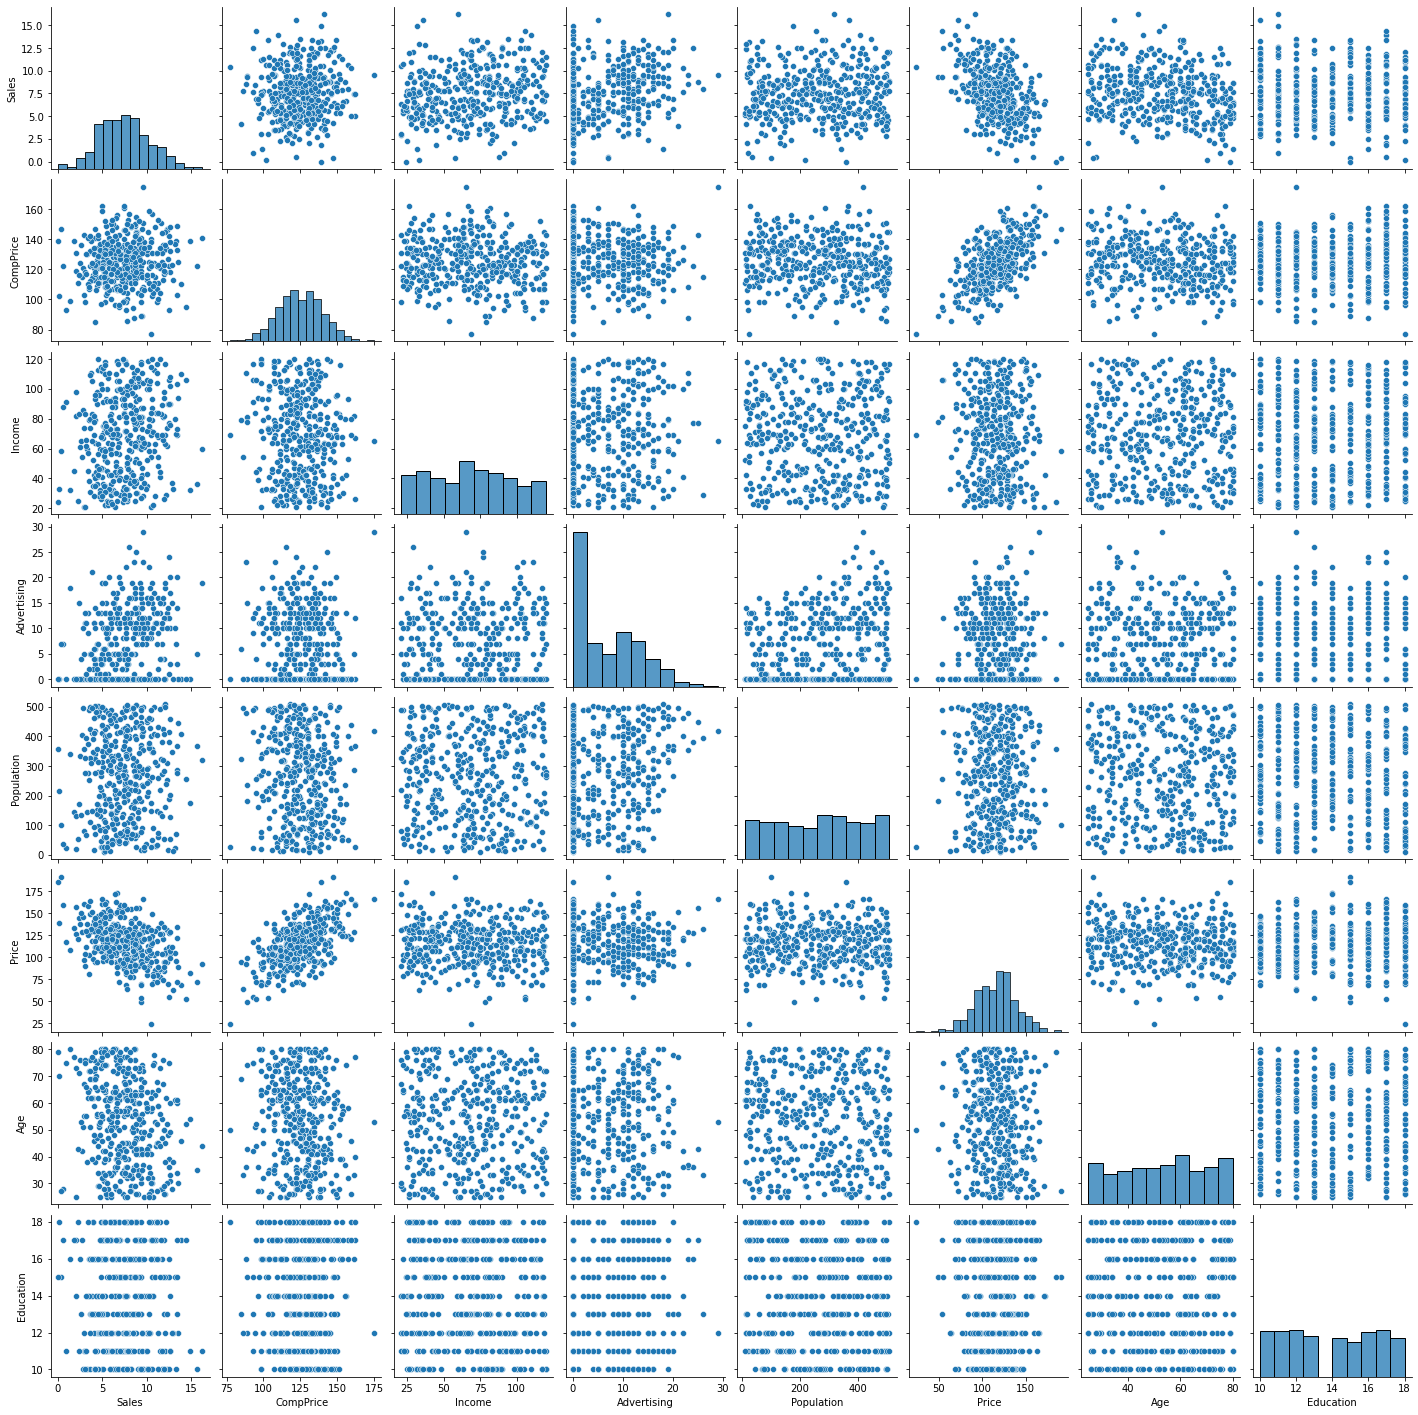

In [6]:
import seaborn as sns
sns.pairplot(cd)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


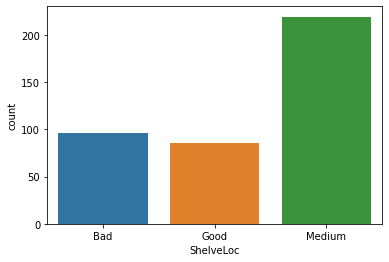

In [7]:
sns.countplot(cd['ShelveLoc'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


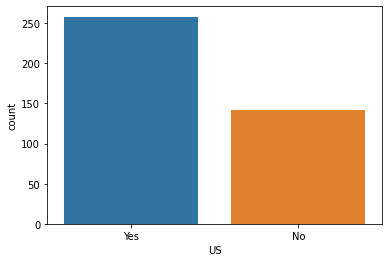

In [8]:
sns.countplot(cd['US'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


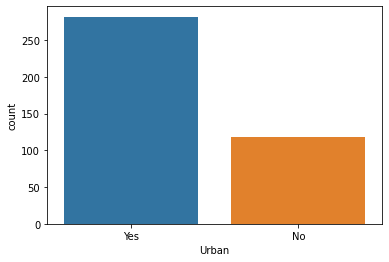

In [9]:
sns.countplot(cd['Urban'])
plt.show()


In [10]:
corr = cd.corr()

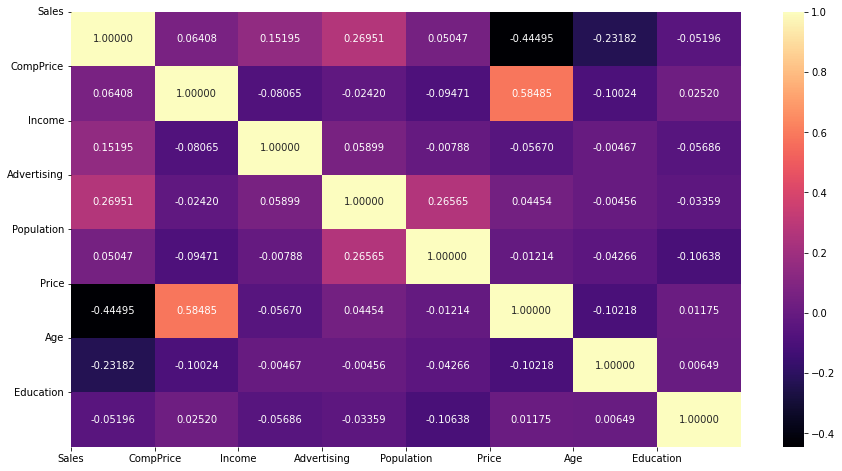

In [11]:
from typing import ChainMap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".5f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

converting numerical to categorical

In [12]:
cd['Sales'] = pd.cut(x=cd['Sales'],bins=[0, 7, 14, 20], labels=['Low','Medium', 'High'], right = False)
cd['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395    Medium
396       Low
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

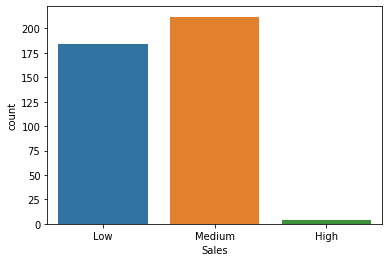

In [13]:
sns.countplot(cd['Sales'])

In [14]:
cd['Sales'].value_counts()

Medium    212
Low       184
High        4
Name: Sales, dtype: int64

In [15]:
cd['CompPrice'] = pd.cut(x=cd['CompPrice'],bins=[88, 110, 143, 186], labels=['Low','Medium', 'High'], right = False)
cd['Income'] = pd.cut(x=cd['Income'],bins=[22, 47, 81, 132], labels=['Low','Medium', 'High'], right = False)
cd['Advertising'] = pd.cut(x=cd['Advertising'],bins=[0, 20, 40, 60], labels=['Low','Medium', 'High'], right = False)
cd['Population'] = pd.cut(x=cd['Population'],bins=[10, 140, 300, 480], labels=['Low','Medium', 'High'], right = False)
cd['Price'] = pd.cut(x=cd['Price'],bins=[24, 50, 106, 142], labels=['Low','Medium', 'High'], right = False)
cd['Age'] = pd.cut(x=cd['Age'],bins=[25, 50, 60, 90], labels=['Low','Medium', 'High'], right = False)
cd['Education'] = pd.cut(x=cd['Education'],bins=[10, 13, 17, 18], labels=['Low','Medium', 'High'], right = False)

In [16]:
cd.head()


Sales CompPrice  Income Advertising Population   Price ShelveLoc     Age  \
0  Medium    Medium  Medium         Low     Medium    High       Bad     Low   
1  Medium    Medium  Medium         Low     Medium  Medium      Good    High   
2  Medium    Medium     Low         Low     Medium  Medium    Medium  Medium   
3  Medium    Medium    High         Low       High  Medium    Medium  Medium   
4     Low    Medium  Medium         Low       High    High       Bad     Low   

  Education Urban   US  
0      High   Yes  Yes  
1       Low   Yes  Yes  
2       Low   Yes  Yes  
3    Medium   Yes  Yes  
4    Medium   Yes   No

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cd['Sales'] = label_encoder.fit_transform(cd['Sales'])
cd['CompPrice'] = label_encoder.fit_transform(cd['CompPrice'])
cd['Income'] = label_encoder.fit_transform(cd['Income'])
cd['Advertising'] = label_encoder.fit_transform(cd['Advertising'])
cd['Population'] = label_encoder.fit_transform(cd['Population'])
cd['Price'] = label_encoder.fit_transform(cd['Price'])
cd['ShelveLoc'] = label_encoder.fit_transform(cd['ShelveLoc'])
cd['Age'] = label_encoder.fit_transform(cd['Age'])
cd['Education'] = label_encoder.fit_transform(cd['Education'])
cd['Urban'] = label_encoder.fit_transform(cd['Urban'])
cd['US'] = label_encoder.fit_transform(cd['US'])

In [18]:
cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2          2       2            0           2      0          0    1   
1        2          2       2            0           2      2          1    0   
2        2          2       1            0           2      2          2    2   
3        2          2       0            0           0      2          2    2   
4        1          2       2            0           0      0          0    1   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      2          2       0            0           2      0          1    1   
396      1          2       1            0           1      0          2    2   
397      2          0       1            0           0      3          2    1   
398      1          1       2            0           2      2          0    2   
399      2          2       1            0           1      0          1    1   

     Education  Urban  US  
0            0      1   1  
1            1      1   1  
2            1      1   1  
3            2      1   1  
4            2      1   0  
..         ...    ...  ..  
395          2      1   1  
396          1      0   1  
397          3      1   1  
398          1      1   1  
399          2      1   1  

[400 rows x 11 columns]

In [19]:
x = cd.drop('Sales', axis = 1)
y = cd['Sales']

In [20]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0            2       2            0           2      0          0    1   
1            2       2            0           2      2          1    0   
2            2       1            0           2      2          2    2   
3            2       0            0           0      2          2    2   
4            2       2            0           0      0          0    1   
..         ...     ...          ...         ...    ...        ...  ...   
395          2       0            0           2      0          1    1   
396          2       1            0           1      0          2    2   
397          0       1            0           0      3          2    1   
398          1       2            0           2      2          0    2   
399          2       1            0           1      0          1    1   

     Education  Urban  US  
0            0      1   1  
1            1      1   1  
2            1      1   1  
3            2      1   1  
4            2      1   0  
..         ...    ...  ..  
395          2      1   1  
396          1      0   1  
397          3      1   1  
398          1      1   1  
399          2      1   1  

[400 rows x 10 columns]

In [21]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    2
396    1
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.42, random_state= 32)

In [23]:
x_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
279          2       2            0           0      3          2    0   
81           2       2            0           2      0          1    0   
345          2       2            0           2      3          1    0   
204          0       2            0           2      0          2    1   
112          2       0            0           2      0          1    0   
..         ...     ...          ...         ...    ...        ...  ...   
380          1       2            0           1      2          2    0   
310          0       2            1           0      3          2    2   
389          2       1            0           0      0          2    1   
43           2       1            0           1      0          2    2   
215          2       0            0           2      3          0    0   

     Education  Urban  US  
279          3      1   1  
81           2      1   0  
345          1      1   0  
204          2      1   0  
112          1      1   1  
..         ...    ...  ..  
380          0      1   1  
310          1      1   1  
389          1      1   1  
43           2      1   1  
215          1      1   1  

[232 rows x 10 columns]

In [24]:
x_test

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
223          2       1            0           2      0          2    0   
145          0       2            0           1      0          2    1   
146          2       0            0           0      0          0    1   
366          2       2            0           0      0          2    2   
268          2       2            0           1      2          2    1   
..         ...     ...          ...         ...    ...        ...  ...   
225          1       1            0           0      2          0    1   
160          2       1            0           3      0          2    1   
219          2       2            0           0      0          1    2   
304          2       0            0           0      0          1    1   
351          2       0            0           0      2          2    0   

     Education  Urban  US  
223          2      1   1  
145          0      1   1  
146          2      1   0  
366          1      0   1  
268          1      1   0  
..         ...    ...  ..  
225          2      1   0  
160          1      0   0  
219          0      1   1  
304          1      1   1  
351          2      0   1  

[168 rows x 10 columns]

In [25]:
y_train

279    1
81     2
345    1
204    2
112    1
      ..
380    2
310    2
389    2
43     1
215    1
Name: Sales, Length: 232, dtype: int64

In [26]:
y_test

223    1
145    2
146    1
366    1
268    1
      ..
225    1
160    1
219    2
304    2
351    2
Name: Sales, Length: 168, dtype: int64

C5.0 Algorithm

In [27]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[5] <= 0.5\nentropy = 1.085\nsamples = 232\nvalue = [3, 109, 120]'),
 Text(0.25, 0.625, 'X[3] <= 2.5\nentropy = 0.797\nsamples = 58\nvalue = [0, 44, 14]'),
 Text(0.125, 0.375, 'X[0] <= 0.5\nentropy = 0.706\nsamples = 52\nvalue = [0, 42, 10]'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.575\nsamples = 44\nvalue = [0, 38, 6]'),
 Text(0.375, 0.375, 'X[6] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.3125, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.625, 'X[5] <= 1.5\nentropy = 1.067\nsamples = 174\nvalue = [3, 65, 106]'),
 Text(0.625, 0.375, 'X[6] <= 0.5\nentropy = 0.91\nsamples = 49\nvalue = [3, 7, 39]'),
 Text(0.5625, 0.125, 'entropy = 0.918\nsamples = 18\nvalue = [0, 6, 12]'),
 Text(0.6875, 0.125, 'entropy = 0.659\nsamples = 31\nvalue = [3, 1, 27]'),
 Text(0.875, 0.375, 'X[4] <= 2.5\nen

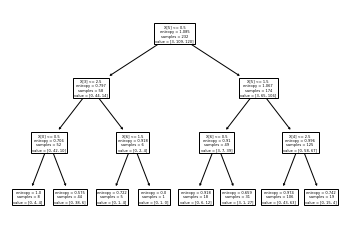

In [28]:
tree.plot_tree(model1)

In [29]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20, 8), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
pred = model1.predict(x_test)
pd.Series(pred).value_counts()

2    124
1     44
dtype: int64

In [31]:
pred

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2])

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

In [33]:
cm

array([[ 0,  0,  1],
       [ 0, 32, 43],
       [ 0, 12, 80]])

In [34]:
model1.score(x_test, y_test)

0.6666666666666666

The model is 67% accurate for c5 algorithm

CART ALGORITHM

In [35]:
from sklearn.tree import  DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.5243055555555556, 0.9166666666666666, 'X[5] <= 0.5\ngini = 0.512\nsamples = 232\nvalue = [3, 109, 120]'),
 Text(0.2708333333333333, 0.75, 'X[3] <= 2.5\ngini = 0.366\nsamples = 58\nvalue = [0, 44, 14]'),
 Text(0.1527777777777778, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.311\nsamples = 52\nvalue = [0, 42, 10]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[4] <= 1.5\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.05555555555555555, 0.25, 'X[6] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[4] <= 1.0\ngini = 0.236\nsamples = 44\nvalue = [0, 38, 6]'),
 Text(0.16666666666666666, 0.25, 'X[7] <= 0.5\ngini = 0.074\nsamples = 26\nvalue = [0, 25, 1]'),


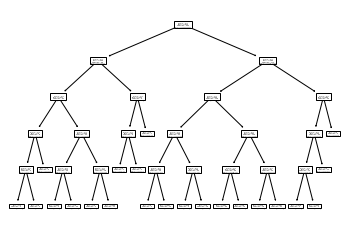

In [36]:
tree.plot_tree(model2)

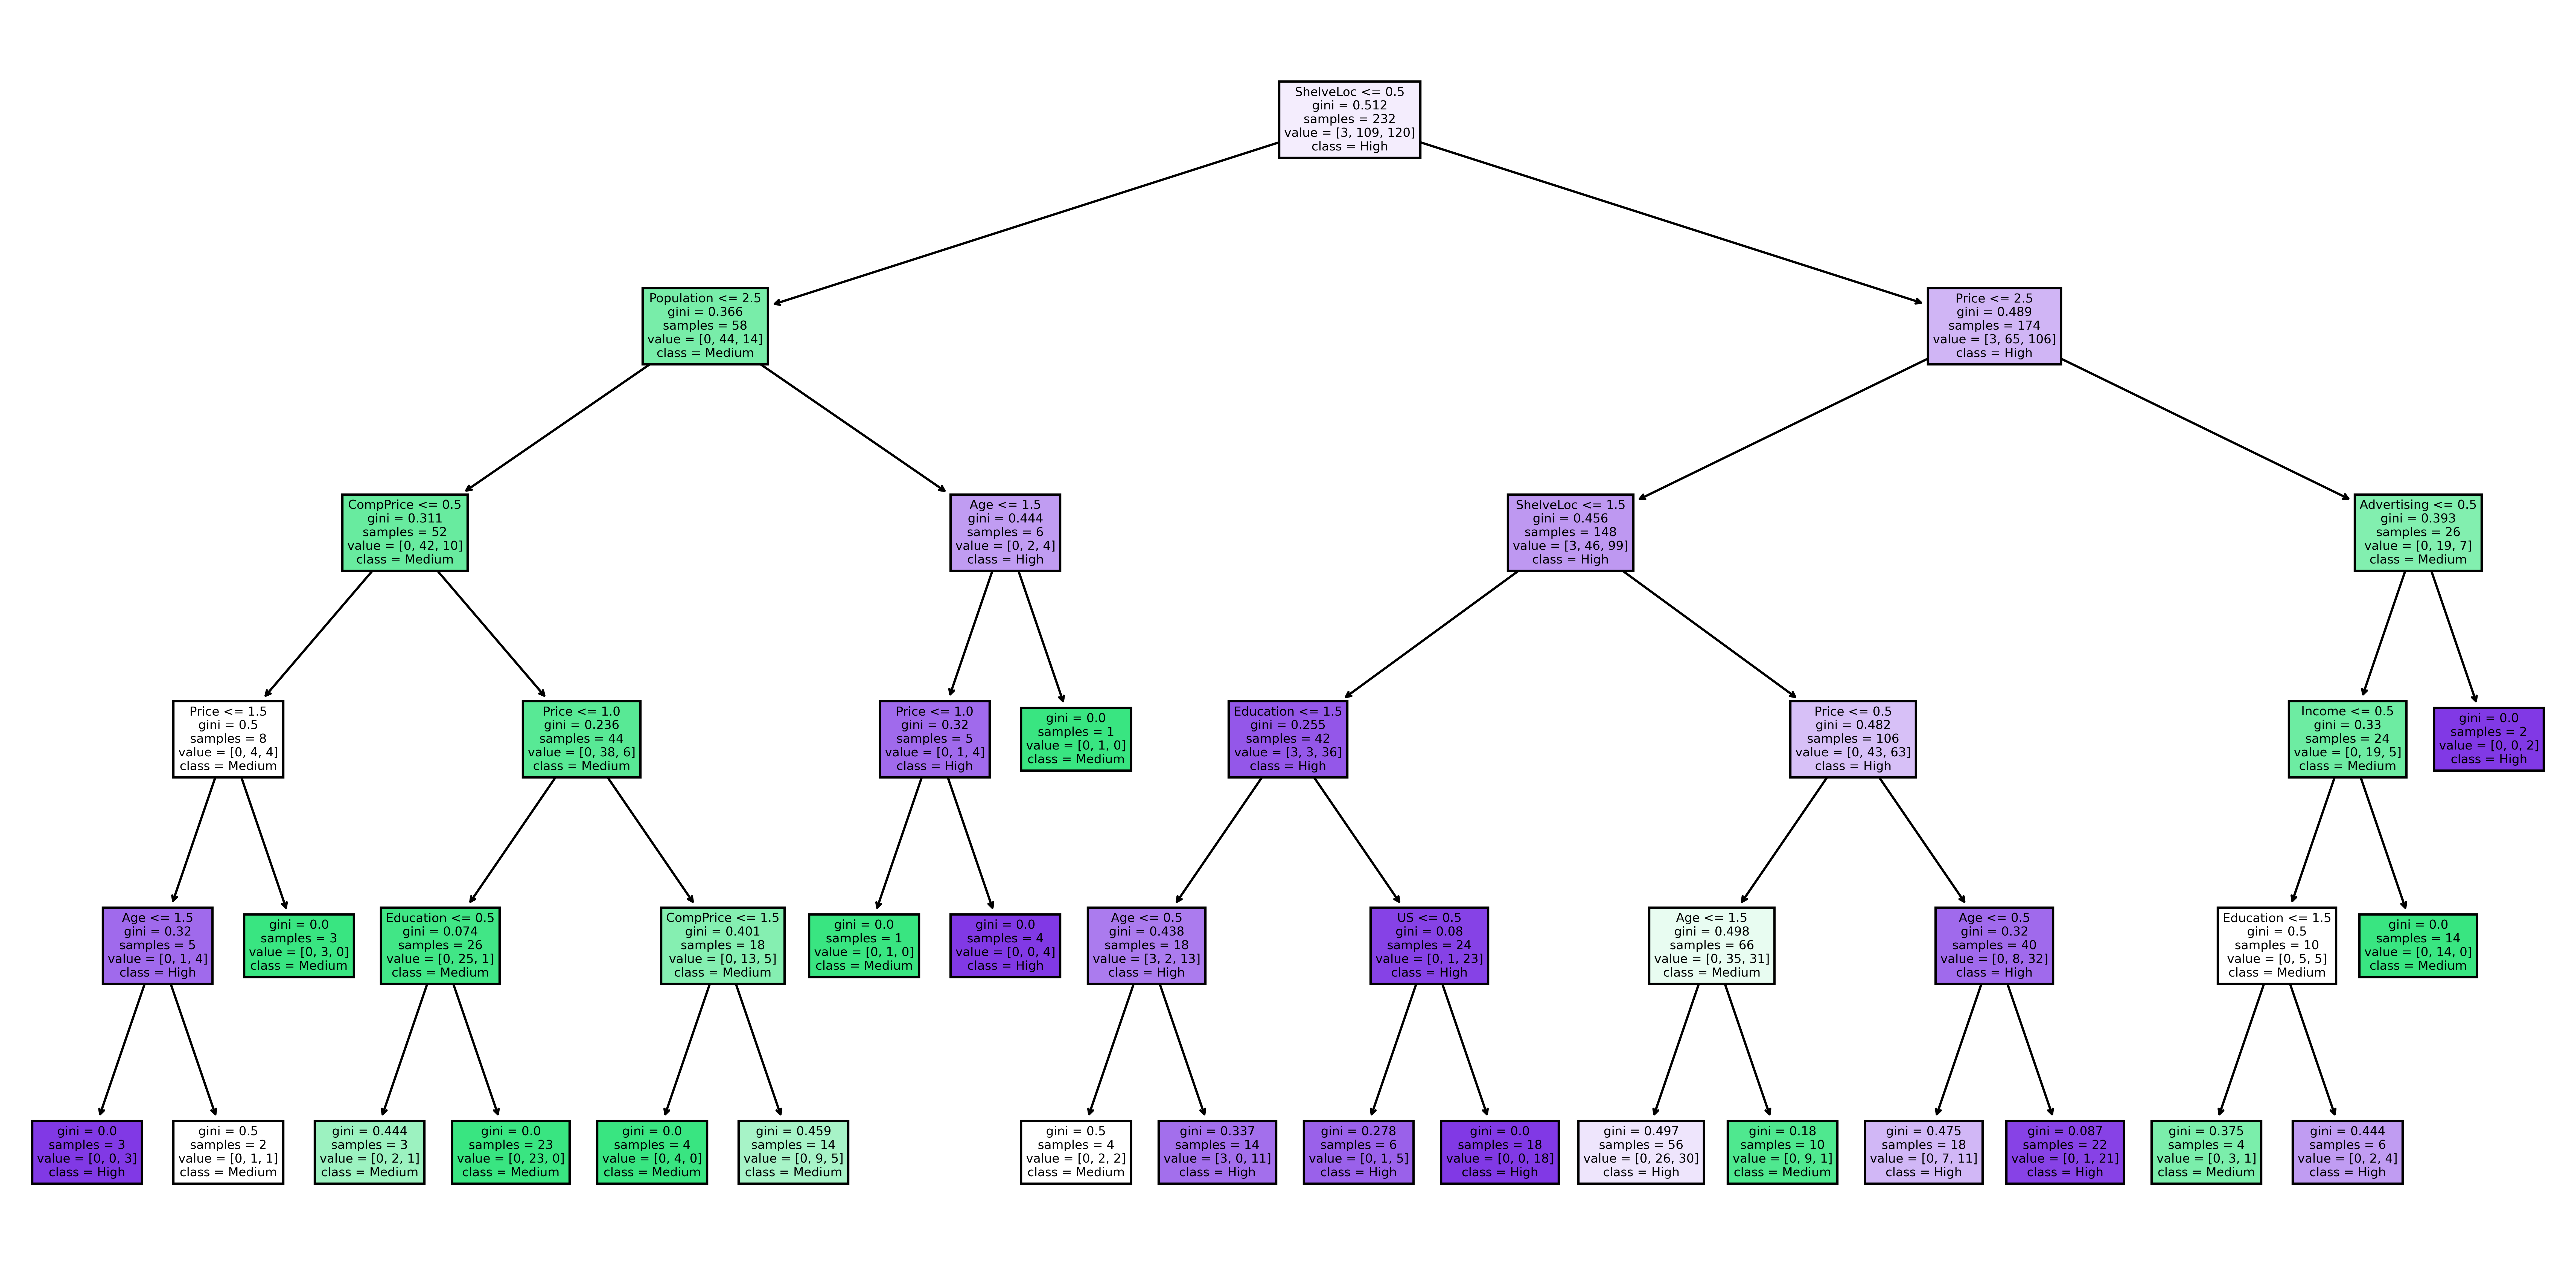

In [37]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=600)
tree.plot_tree(model2,feature_names = fn,class_names=cn,filled = True);



In [38]:
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

2    104
1     64
dtype: int64

In [39]:
preds

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2])

In [40]:
cm2 = confusion_matrix(y_test, preds)

In [41]:
cm2

array([[ 0,  0,  1],
       [ 0, 40, 35],
       [ 0, 24, 68]])

In [42]:
model2.score(x_test, y_test)

0.6428571428571429

model is 66% accurate for CART ALGORITHM 